In [2]:
library(Seurat)
library(ggplot2)
library(readxl)
library(sva)
library(dplyr)
library(tidyverse)
library(limma)
library(affy)
library(affyio)

In [3]:
in_path <- "D://FILES/work/Sensor/ISensors_data/"
microarr_path <- paste0(in_path, 'Auxin_transcriptoms/microarrays/')
out_path <- paste0(microarr_path, 'for stat/')

In [4]:
out_path

[1] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/for stat/"

In [5]:
sheet_names <- excel_sheets('microarrays_metadata.xlsx')

In [6]:
sheet_names

[1] "Лист1"            "PerformanceTest1" "PerformanceTest2" "PerformanceTest3"

In [7]:
sheet_names[2]

[1] "PerformanceTest1"

In [8]:
PerformanceTest <- sheet_names[2]

In [9]:
metaData <- read_excel('microarrays_metadata.xlsx', sheet = PerformanceTest)

In [10]:
head(metaData)

Phytohormone name,Platform,Ecotype,Duration,Tissue,Growth conditions,Treatment raw samples,Control raw samples,Up-regulated DEG number,Down-regulated DEG number,Reference,Data directory name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Auxin (IAA 1uM),GPL198,Col-0,0.5h,Root,6 DAG,"GSM1030567,GSM1030583,GSM1030599","GSM1030559,GSM1030575,GSM1030591",18,130,PMID: 24045021,auxin_root_05h_lewis
Auxin (IAA 1uM),GPL198,Col-0,1h,Root,6 DAG,"GSM1030568,GSM1030584,GSM1030600","GSM1030560,GSM1030576,GSM1030592",19,89,PMID: 24045021,auxin_root_1h_lewis
Auxin (IAA 1uM),GPL198,Col-0,2h,Root,6 DAG,"GSM1030569,GSM1030585,GSM1030601","GSM1030561,GSM1030577,GSM1030593",89,164,PMID: 24045021,auxin_root_2h_lewis
Auxin (IAA 1uM),GPL198,Col-0,4h,Root,6 DAG,"GSM1030570,GSM1030586,GSM1030602","GSM1030562,GSM1030578,GSM1030594",1607,1638,PMID: 24045021,auxin_root_4h_lewis
Auxin (IAA 1uM),GPL198,Col-0,8h,Root,6 DAG,"GSM1030571,GSM1030587,GSM1030603","GSM1030563,GSM1030579,GSM1030595",1602,1616,PMID: 24045021,auxin_root_8h_lewis
Auxin (IAA 1uM),GPL198,Col-0,12h,Root,6 DAG,"GSM1030572,GSM1030588,GSM1030604","GSM1030564,GSM1030580,GSM1030596",1036,1212,PMID: 24045021,auxin_root_12h_lewis


In [11]:
strsplit('Auxin (IAA 1uM)', ' ')

[[1]]
[1] "Auxin" "(IAA"  "1uM)"

In [12]:
filesDir <- paste0(microarr_path, metaData[['Data directory name']])

In [13]:
filesDir

[1] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_05h_lewis"
[2] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_1h_lewis" 
[3] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_2h_lewis" 
[4] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_4h_lewis" 
[5] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_8h_lewis" 
[6] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_12h_lewis"
[7] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_24h_lewis"

In [14]:
list.files(path = filesDir[1], pattern = "counts", full.names = TRUE)

[1] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/auxin_root_05h_lewis/auxin_root_05h_lewis_counts.txt"

In [15]:
dataLst <- lapply(filesDir, function(x) {
    filePath <- list.files(path = x, pattern = "counts", full.names = TRUE)
    tmpData <- read.table(filePath, header = TRUE, sep = "\t")
    return(tmpData)
})
names(dataLst) <- metaData[['Data directory name']]

In [16]:
names(dataLst)

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [17]:
data_no_Gene_list <- sapply(dataLst, function(df) "Gene" %in% colnames(df))

In [18]:
length(data_no_Gene_list)

[1] 7

In [19]:
names(data_no_Gene_list)

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [20]:
false_names <- names(data_no_Gene_list)[unlist(data_no_Gene_list) == FALSE]

In [21]:
false_names

character(0)

In [22]:
info_list <- strsplit(metaData[['Data directory name']], '_')

In [23]:
info_list

[[1]]
[1] "auxin" "root"  "05h"   "lewis"

[[2]]
[1] "auxin" "root"  "1h"    "lewis"

[[3]]
[1] "auxin" "root"  "2h"    "lewis"

[[4]]
[1] "auxin" "root"  "4h"    "lewis"

[[5]]
[1] "auxin" "root"  "8h"    "lewis"

[[6]]
[1] "auxin" "root"  "12h"   "lewis"

[[7]]
[1] "auxin" "root"  "24h"   "lewis"

In [24]:
# for concentration
for (elem in c(1:length(info_list))) {
    info_list[[elem]][3] <- metaData[['Concentration, uM']][elem]
}

ERROR: Error in info_list[[elem]][3] <- metaData[["Concentration, uM"]][elem]: замена имеет нулевую длину


In [25]:
info_list

[[1]]
[1] "auxin" "root"  "05h"   "lewis"

[[2]]
[1] "auxin" "root"  "1h"    "lewis"

[[3]]
[1] "auxin" "root"  "2h"    "lewis"

[[4]]
[1] "auxin" "root"  "4h"    "lewis"

[[5]]
[1] "auxin" "root"  "8h"    "lewis"

[[6]]
[1] "auxin" "root"  "12h"   "lewis"

[[7]]
[1] "auxin" "root"  "24h"   "lewis"

In [27]:
library(AnnotationDbi)
library(ath1121501.db)

In [28]:
filter_agi <- function(df) {
  # Регулярное выражение для AGI: At[1-5]g + 5 цифр
  agi_pattern <- "^At[1-5]g\\d{5}$"
  
  # Фильтруем строки, где Gene соответствует паттерну
  df_filtered <- df[grepl(agi_pattern, df$Gene, ignore.case = FALSE), ]
  
  return(df_filtered)
}

In [29]:
dataLst <- lapply(dataLst, filter_agi)

In [30]:
names(dataLst)

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [32]:
# Функция для переименования столбцов
rename_cont_treat <- function(df) {
  # Игнорируем первый столбец (Gene)
  data <- df[, -1]
  
  # Определяем количество столбцов
  n <- ncol(data)
  
  # Проверяем, что количество столбцов четное
  if (n %% 2 != 0) {
    stop("Количество столбцов должно быть четным.")
  }
  
  # Переименовываем первую половину
  colnames(data)[1:(n/2)] <- paste0("control_", 1:(n/2))
  
  # Переименовываем вторую половину
  colnames(data)[(n/2 + 1):n] <- paste0("treat_", 1:(n/2))
  
  # Возвращаем измененный data.frame с Gene
  return(cbind(Gene = df$Gene, data))
}

rename_columns <- function(df, df_name) {
  # Игнорируем первый столбец (Gene)
  data <- df[, -1]
  
  # Переименовываем столбцы, добавляя имя data.frame
  colnames(data) <- paste0(colnames(data), "_", df_name)
  
  # Возвращаем измененный data.frame с Gene
  return(cbind(Gene = df$Gene, data))
}

In [33]:
dataLst <- lapply(dataLst, rename_cont_treat)

In [34]:
names(dataLst)

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [36]:
dataLst <- lapply(names(dataLst), function(name) {
  rename_columns(dataLst[[name]], name)
})

In [37]:
names(dataLst) <- metaData[['Data directory name']]

In [38]:
names(dataLst)

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [40]:
combined_data <- Reduce(function(x, y) merge(x, y, by = "Gene", all = TRUE), dataLst)

In [41]:
combined_data[['Gene']] <- toupper(combined_data[['Gene']])

In [42]:
head(combined_data)

,Gene,control_1_auxin_root_05h_lewis,control_2_auxin_root_05h_lewis,control_3_auxin_root_05h_lewis,treat_1_auxin_root_05h_lewis,treat_2_auxin_root_05h_lewis,treat_3_auxin_root_05h_lewis,control_1_auxin_root_1h_lewis,control_2_auxin_root_1h_lewis,control_3_auxin_root_1h_lewis,...,control_3_auxin_root_12h_lewis,treat_1_auxin_root_12h_lewis,treat_2_auxin_root_12h_lewis,treat_3_auxin_root_12h_lewis,control_1_auxin_root_24h_lewis,control_2_auxin_root_24h_lewis,control_3_auxin_root_24h_lewis,treat_1_auxin_root_24h_lewis,treat_2_auxin_root_24h_lewis,treat_3_auxin_root_24h_lewis
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AT1G01010,7.527425,6.938330,7.778689,8.389729,7.819604,7.838244,7.740494,7.965334,7.775617,...,7.175235,7.603388,7.408184,7.694629,7.172227,7.468158,7.812364,7.391191,7.938755,7.455614
2,AT1G01030,3.931748,4.106721,4.122371,4.082307,4.258360,4.128176,3.824716,4.217844,4.085430,...,4.420025,3.865036,4.132756,4.167547,3.911454,3.970772,3.624793,4.055953,4.036807,4.208124
3,AT1G01040,8.061331,7.990733,8.161065,8.141055,8.019805,7.964747,8.096385,7.803683,8.090891,...,8.167960,8.116670,8.046161,8.346261,7.975195,7.447154,8.046888,8.302792,8.540575,8.119161
4,AT1G01050,10.895186,11.094588,11.020393,10.989940,10.959911,10.523209,10.897536,10.962026,10.940409,...,10.955536,11.121160,11.217391,11.162721,10.678303,11.057718,10.811344,10.760074,11.072529,10.806420
5,AT1G01060,7.669805,7.565171,7.847078,7.868427,7.733956,7.645178,8.081948,7.912818,8.169260,...,8.060461,8.018771,8.027236,7.981102,8.246088,7.397034,7.820866,8.020514,8.222373,8.003205
6,AT1G01070,7.977629,7.550948,7.559856,8.315999,8.188049,6.605168,8.884176,7.752863,8.162227,...,7.675400,8.391572,8.544462,8.383806,8.385775,7.841219,8.489969,7.746261,8.379901,7.945404


In [43]:
expression_matrix <- as.matrix(combined_data[,-1])

In [44]:
rownames(expression_matrix) <- combined_data[['Gene']]

In [45]:
head(expression_matrix)

,control_1_auxin_root_05h_lewis,control_2_auxin_root_05h_lewis,control_3_auxin_root_05h_lewis,treat_1_auxin_root_05h_lewis,treat_2_auxin_root_05h_lewis,treat_3_auxin_root_05h_lewis,control_1_auxin_root_1h_lewis,control_2_auxin_root_1h_lewis,control_3_auxin_root_1h_lewis,treat_1_auxin_root_1h_lewis,...,control_3_auxin_root_12h_lewis,treat_1_auxin_root_12h_lewis,treat_2_auxin_root_12h_lewis,treat_3_auxin_root_12h_lewis,control_1_auxin_root_24h_lewis,control_2_auxin_root_24h_lewis,control_3_auxin_root_24h_lewis,treat_1_auxin_root_24h_lewis,treat_2_auxin_root_24h_lewis,treat_3_auxin_root_24h_lewis
AT1G01010,7.527425,6.938330,7.778689,8.389729,7.819604,7.838244,7.740494,7.965334,7.775617,7.845227,...,7.175235,7.603388,7.408184,7.694629,7.172227,7.468158,7.812364,7.391191,7.938755,7.455614
AT1G01030,3.931748,4.106721,4.122371,4.082307,4.258360,4.128176,3.824716,4.217844,4.085430,4.319370,...,4.420025,3.865036,4.132756,4.167547,3.911454,3.970772,3.624793,4.055953,4.036807,4.208124
AT1G01040,8.061331,7.990733,8.161065,8.141055,8.019805,7.964747,8.096385,7.803683,8.090891,8.050963,...,8.167960,8.116670,8.046161,8.346261,7.975195,7.447154,8.046888,8.302792,8.540575,8.119161
AT1G01050,10.895186,11.094588,11.020393,10.989940,10.959911,10.523209,10.897536,10.962026,10.940409,10.794089,...,10.955536,11.121160,11.217391,11.162721,10.678303,11.057718,10.811344,10.760074,11.072529,10.806420
AT1G01060,7.669805,7.565171,7.847078,7.868427,7.733956,7.645178,8.081948,7.912818,8.169260,8.343928,...,8.060461,8.018771,8.027236,7.981102,8.246088,7.397034,7.820866,8.020514,8.222373,8.003205
AT1G01070,7.977629,7.550948,7.559856,8.315999,8.188049,6.605168,8.884176,7.752863,8.162227,9.084212,...,7.675400,8.391572,8.544462,8.383806,8.385775,7.841219,8.489969,7.746261,8.379901,7.945404


In [46]:
batch_names <- gsub("\\.txt$", "", basename(metaData[['Data directory name']]))

In [47]:
batch_names

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [48]:
sample_counts <- sapply(dataLst, ncol) - 1

In [49]:
sample_counts

auxin_root_05h_lewis  auxin_root_1h_lewis  auxin_root_2h_lewis 
                   6                    6                    6 
 auxin_root_4h_lewis  auxin_root_8h_lewis auxin_root_12h_lewis 
                   6                    6                    6 
auxin_root_24h_lewis 
                   6

In [50]:
batch <- factor(rep(batch_names, times = sample_counts))

In [51]:
normalized_counts <- normalizeBetweenArrays(expression_matrix)

In [52]:
corrected_data <- ComBat(dat = normalized_counts, batch = batch)

Found 2 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found7batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [55]:
seurat_obj <- CreateSeuratObject(counts = corrected_data, project = paste0("microarrays_", PerformanceTest))

Warning message:
"Data is of class matrix. Coercing to dgCMatrix."


In [56]:
info_list

[[1]]
[1] "auxin" "root"  "05h"   "lewis"

[[2]]
[1] "auxin" "root"  "1h"    "lewis"

[[3]]
[1] "auxin" "root"  "2h"    "lewis"

[[4]]
[1] "auxin" "root"  "4h"    "lewis"

[[5]]
[1] "auxin" "root"  "8h"    "lewis"

[[6]]
[1] "auxin" "root"  "12h"   "lewis"

[[7]]
[1] "auxin" "root"  "24h"   "lewis"

In [61]:
head(metaData)

Phytohormone name,Platform,Ecotype,Duration,Tissue,Growth conditions,Treatment raw samples,Control raw samples,Up-regulated DEG number,Down-regulated DEG number,Reference,Data directory name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Auxin (IAA 1uM),GPL198,Col-0,0.5h,Root,6 DAG,"GSM1030567,GSM1030583,GSM1030599","GSM1030559,GSM1030575,GSM1030591",18,130,PMID: 24045021,auxin_root_05h_lewis
Auxin (IAA 1uM),GPL198,Col-0,1h,Root,6 DAG,"GSM1030568,GSM1030584,GSM1030600","GSM1030560,GSM1030576,GSM1030592",19,89,PMID: 24045021,auxin_root_1h_lewis
Auxin (IAA 1uM),GPL198,Col-0,2h,Root,6 DAG,"GSM1030569,GSM1030585,GSM1030601","GSM1030561,GSM1030577,GSM1030593",89,164,PMID: 24045021,auxin_root_2h_lewis
Auxin (IAA 1uM),GPL198,Col-0,4h,Root,6 DAG,"GSM1030570,GSM1030586,GSM1030602","GSM1030562,GSM1030578,GSM1030594",1607,1638,PMID: 24045021,auxin_root_4h_lewis
Auxin (IAA 1uM),GPL198,Col-0,8h,Root,6 DAG,"GSM1030571,GSM1030587,GSM1030603","GSM1030563,GSM1030579,GSM1030595",1602,1616,PMID: 24045021,auxin_root_8h_lewis
Auxin (IAA 1uM),GPL198,Col-0,12h,Root,6 DAG,"GSM1030572,GSM1030588,GSM1030604","GSM1030564,GSM1030580,GSM1030596",1036,1212,PMID: 24045021,auxin_root_12h_lewis


In [105]:
names(dataLst)

[1] "auxin_root_05h_lewis" "auxin_root_1h_lewis"  "auxin_root_2h_lewis" 
[4] "auxin_root_4h_lewis"  "auxin_root_8h_lewis"  "auxin_root_12h_lewis"
[7] "auxin_root_24h_lewis"

In [140]:
colNumsVec <- sapply(dataLst, function(x) ncol(x)-1)

In [145]:
# Create metadata dataframe
sample_info <- data.frame(
    Sample = unname(unlist( lapply(colNumsVec, function(x) c( rep('control', x/2), rep('treat', x/2) )))),
    Tissue = rep(metaData[['Tissue']], colNumsVec),
    Duration = rep(metaData[['Duration']], colNumsVec),
  # Concentration = rep(sapply(info_list, function(x) x[3]), sapply(dataLst, function(x) ncol(x)-1)),
  row.names = colnames(expression_matrix)
)

In [147]:
# Add metadata to Seurat object
seurat_obj <- AddMetaData(seurat_obj, metadata = sample_info)

In [148]:
# Normalize the data (optional step based on your analysis)
seurat_obj <- NormalizeData(seurat_obj, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [149]:
# Find variable features (for downstream analysis)
seurat_obj <- FindVariableFeatures(seurat_obj, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts



In [150]:
# Scaling the data (for PCA and clustering)
seurat_obj <- ScaleData(seurat_obj, features = rownames(seurat_obj))

Centering and scaling data matrix



In [151]:
# Perform PCA
num_pcs <- min(30, ncol(seurat_obj) - 1)  # Avoid PCA error if columns are fewer than PCs
seurat_obj <- RunPCA(seurat_obj, features = VariableFeatures(object = seurat_obj), npcs = num_pcs)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."
PC_ 1 
Positive:  AT4G26320, AT5G53250, AT4G12510, AT1G05650, AT2G34500, AT3G59370, AT1G76240, AT1G72200, AT1G03870, AT5G56540 
	   AT2G39050, AT3G49190, AT3G63470, AT4G12730, AT4G25250, AT5G10430, AT1G75750, AT5G24100, AT3G12110, AT5G66815 
	   AT3G23730, AT5G26655, AT4G15290, AT2G20750, AT5G65390, AT2G28110, AT1G55330, AT4G35060, AT3G54770, AT5G46900 
Negative:  AT2G28690, AT1G31650, AT3G16500, AT1G66480, AT3G10870, AT1G33790, AT4G09460, AT2G23060, AT3G13380, AT2G45420 
	   AT5G65320, AT5G51380, AT4G37295, AT5G52900, AT3G07390, AT1G64405, AT1G68400, AT2G03730, AT2G14960, AT2G03850 
	   AT1G34110, AT4G13195, AT1G33590, AT1G10770, AT2G37280, AT3G13672, AT2G39870, AT1G69530, AT3G27580, AT3G28850 
PC_ 2 
Positive:  AT5G19550, AT1G36180, AT1G02220, AT2G20800, AT1G56430, AT1G51420, AT1G60730, AT1G02530, AT5G09570, AT1G23020 
	   AT2G36

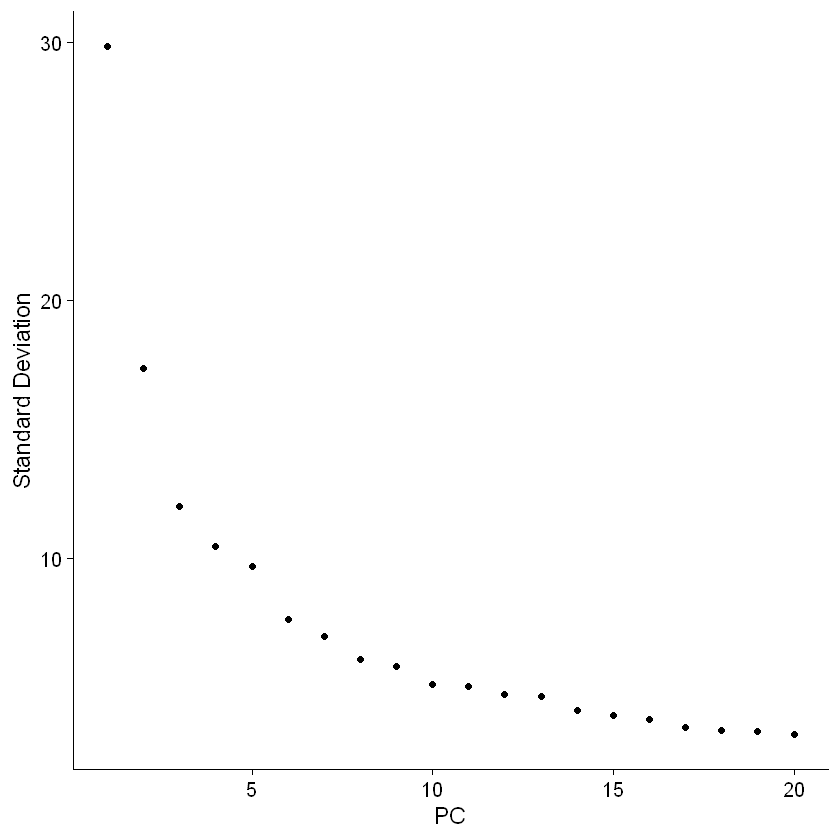

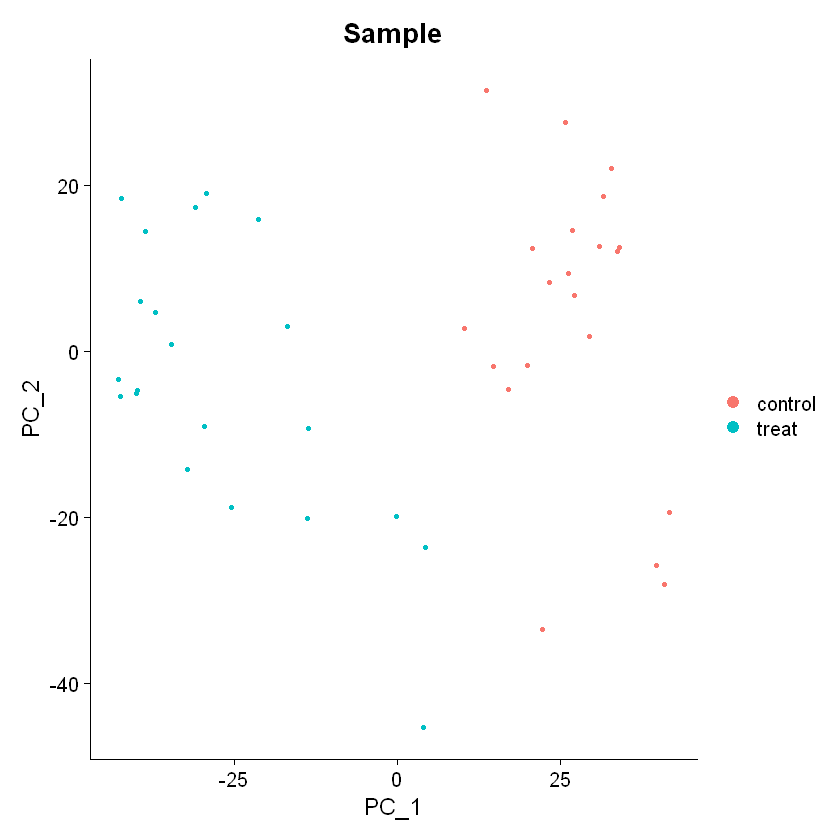

In [153]:
# Visualize PCA results
ElbowPlot(seurat_obj)  # Determine the number of PCs to use
DimPlot(seurat_obj, reduction = "pca", group.by = "Sample")  # PCA colored by sample

In [154]:
# Run UMAP (Uniform Manifold Approximation and Projection)
# Determine the number of available samples
num_samples <- ncol(seurat_obj)

In [155]:
# Run UMAP with adjusted parameters
seurat_obj <- RunUMAP(
  seurat_obj, 
  dims = 1:num_pcs, 
  reduction = "pca",  # Ensure it uses PCA
  n.neighbors = min(10, num_samples - 1),  # Ensuring it's within the correct limit
  umap.method = 'uwot', 
  metric = 'cosine'  # Recommended for gene expression data
)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
19:11:16 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

19:11:16 Read 42 rows and found 30 numeric columns

19:11:16 Using Annoy for neighbor search, n_neighbors = 10

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

19:11:16 Building Annoy index with metric = cosine, n_trees = 50

19:11:16 Writing NN index file to temp file C:\Users\user\AppData\Local\Temp\Rtmp2vCM9r\file52fc38b94aea

19:11:16 Searching Annoy index using 1 thread, search_k = 1000

19:11:16 Annoy recall = 100%

19:11:17 Commencing smooth kNN distance calibrati

In [156]:
paste0(out_path, 'seurat_auxin_microarrays_', PerformanceTest, '.rds')

[1] "D://FILES/work/Sensor/ISensors_data/Auxin_transcriptoms/microarrays/for stat/seurat_auxin_microarrays_PerformanceTest1.rds"

In [157]:
saveRDS(seurat_obj, file = paste0(out_path, 'seurat_auxin_microarrays_', PerformanceTest, '.rds'))